In [1]:
%load_ext autoreload
%autoreload 2

import os

from IPython.display import Image
from IPython.display import display

from tinybatrees import visualization as tree_view
from tinybatrees import persistence as tree_io

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
X = iris.data[:,2:].astype('float32')
y = iris.target[:].astype('float32')

X.shape, y.shape

((150, 2), (150,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 2), (120,), (30, 2), (30,))

In [6]:
from sklearn.ensemble import RandomForestClassifier

rforest_clf = RandomForestClassifier(random_state=42, n_estimators=3, max_depth=2)
rforest_clf.fit(X_train, y_train)

rforest_clf.score(X_test, y_test)

0.9666666666666667

In [7]:
rf_trees = [e.tree_ for e in rforest_clf.estimators_]
features = {0: 'petal length', 1: 'petal width'}

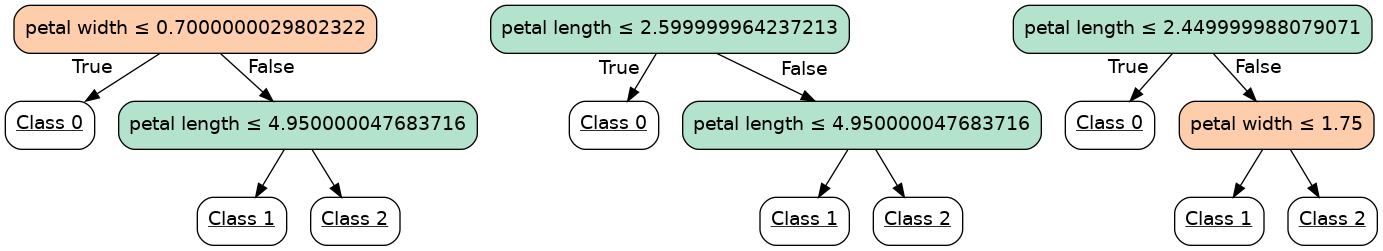

In [8]:
display(Image(tree_view.create_graph(rf_trees, features=features).create_png()))

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(ax, clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()].astype('float32')
    y_pred = np.argmax(clf.predict(X_new), axis=1).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        ax.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        ax.axis(axes)
    if iris:
        ax.set_xlabel("Petal length", fontsize=14)
        ax.set_ylabel("Petal width", fontsize=14)
    else:
        ax.set_xlabel(r"$x_1$", fontsize=18)
        ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        ax.legend(loc="lower right", fontsize=14)

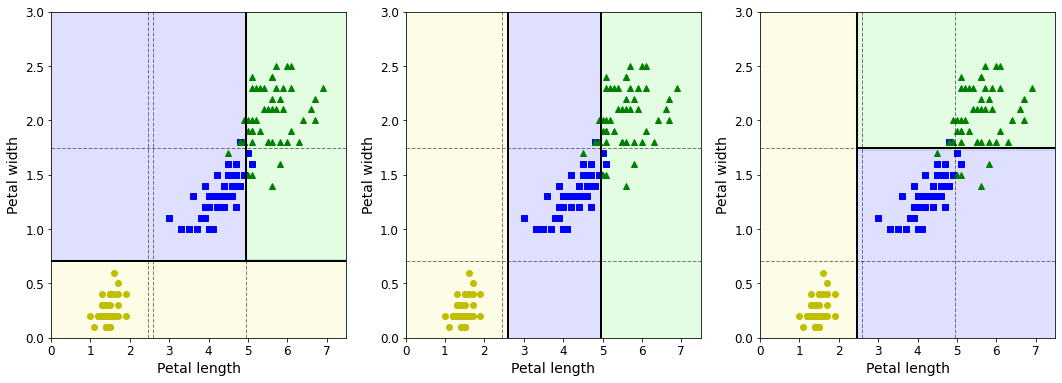

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    plot_decision_boundary(axs[i], rf_trees[i], X, y)
    axs[i].plot([0, 7.5], [0.71, 0.71], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([4.95, 4.95], [0, 3], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([2.6, 2.6], [0, 3], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([2.45, 2.45], [0, 3], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([0, 7.5], [1.75, 1.75], "k--", linewidth=1, alpha=0.5)

axs[0].plot([4.95, 4.95], [0.71, 3], "k-", linewidth=2)
axs[0].plot([0, 7.5], [0.71, 0.71], "k-", linewidth=2)

axs[1].plot([4.95, 4.95], [0, 3], "k-", linewidth=2)
axs[1].plot([2.6, 2.6], [0, 3], "k-", linewidth=2)

axs[2].plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
axs[2].plot([2.45, 7.5], [1.75, 1.75], "k-", linewidth=2)

In [11]:
random_forest_file = "../data/Iris.RF1.txt"
born_again_file = "Iris.BA"
ret = subprocess.run(['../../BA-Trees/src/born_again_dp/bornAgain',
                random_forest_file,
                born_again_file,
                '-trees', '3',
                '-obj', '0'], stdout=subprocess.PIPE)

print("Executed command: \"{}\"\n".format(' '.join(ret.args)))
print(ret.stdout.decode('utf-8'))
if ret.returncode != 0:
    print(ret.stderr.decode('utf-8'))
print('Program exited with code {}.'.format(ret.returncode))

born_again = tree_io.classifier_from_file(born_again_file+".tree", X_train, y_train, pruning=False)
born_again_pruned = tree_io.classifier_from_file(born_again_file+".tree", X_train, y_train, pruning=True)

Executed command: "../../BA-Trees/src/born_again_dp/bornAgain ../data/Iris.RF1.txt Iris.BA -trees 3 -obj 0"

----- READING RANDOM FOREST from ../data/Iris.RF1.txt
READING: [TREE 0]
READING: [TREE 1]
READING: [TREE 2]

enumerate cell (0, 0)
==> new cell index = 0 + 3*0 = 0

enumerate cell (1, 0)
==> new cell index = 0 + 1*0 = 0

enumerate cell (2, 0)
==> saving cell index 0
==> majority class for [ 2.45 0.7 ] = 0
==> new cell index = 0 + 1*1 = 1

enumerate cell (2, 1)
==> saving cell index 1
==> majority class for [ 2.45 1.75 ] = 0
==> new cell index = 0 + 1*2 = 2

enumerate cell (2, 2)
==> saving cell index 2
==> majority class for [ 2.45 1e+30 ] = 0
==> new cell index = 0 + 3*1 = 3

enumerate cell (1, 3)
==> new cell index = 3 + 1*0 = 3

enumerate cell (2, 3)
==> saving cell index 3
==> majority class for [ 2.6 0.7 ] = 0
==> new cell index = 3 + 1*1 = 4

enumerate cell (2, 4)
==> saving cell index 4
==> majority class for [ 2.6 1.75 ] = 1
==> new cell index = 3 + 1*2 = 5

enumerate ce

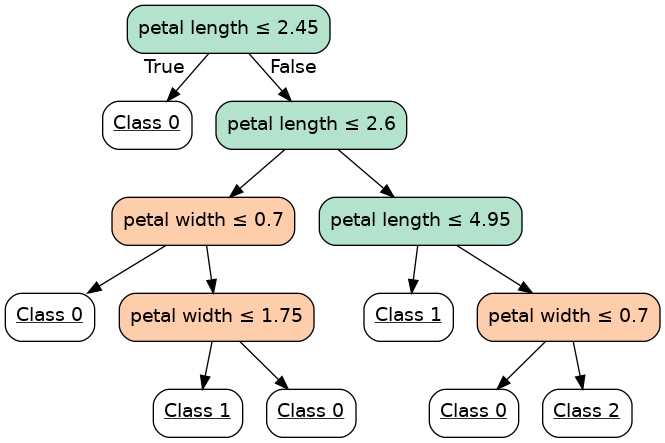

In [12]:
display(Image(tree_view.create_graph([born_again.tree_], features=features).create_png()))

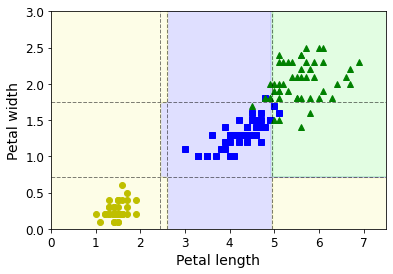

In [13]:
fig, axs = plt.subplots(1)

plot_decision_boundary(axs, born_again.tree_, X, y)

axs.plot([0, 7.5], [0.71, 0.71], "k--", linewidth=1, alpha=0.5)
axs.plot([4.95, 4.95], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([2.6, 2.6], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([2.45, 2.45], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=1, alpha=0.5)

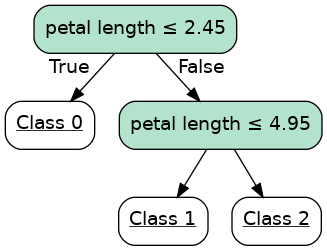

In [14]:
display(Image(tree_view.create_graph([born_again_pruned.tree_], features=features).create_png()))

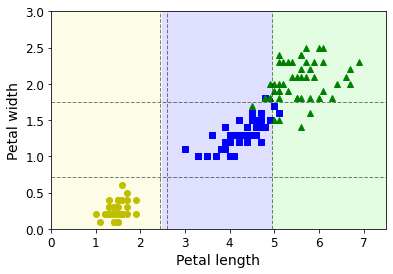

In [15]:
fig, axs = plt.subplots(1)

plot_decision_boundary(axs, born_again_pruned.tree_, X, y)

axs.plot([0, 7.5], [0.71, 0.71], "k--", linewidth=1, alpha=0.5)
axs.plot([4.95, 4.95], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([2.6, 2.6], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([2.45, 2.45], [0, 3], "k--", linewidth=1, alpha=0.5)
axs.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=1, alpha=0.5)

In [16]:
from tinybatrees import BornAgainTree, RandomForest

random_forest = RandomForest("../data/Iris.RF1.txt")

ba_tree = BornAgainTree(random_forest)
ba_tree.build_optimal()
ba_tree.export("Iris.tree", print_content=True)

DATASET_NAME: dataset_name
ENSEMBLE: BA
NB_TREES: 1
NB_FEATURES: 2
NB_CLASSES: 3
MAX_TREE_DEPTH: 4
Format: node / node type(LN - leave node, IN - internal node) left child / right child / feature / threshold / node_depth / majority class (starts with index 0)

[TREE 0]
NB_NODES: 13
0 IN 1 2 0 2.45 0 -1
1 LN -1 -1 -1 -1 1 0
2 IN 3 8 0 2.6 1 -1
3 IN 4 5 1 0.7 2 -1
4 LN -1 -1 -1 -1 3 0
5 IN 6 7 1 1.75 3 -1
6 LN -1 -1 -1 -1 4 1
7 LN -1 -1 -1 -1 4 0
8 IN 9 10 0 4.95 2 -1
9 LN -1 -1 -1 -1 3 1
10 IN 11 12 1 0.7 3 -1
11 LN -1 -1 -1 -1 4 0
12 LN -1 -1 -1 -1 4 2



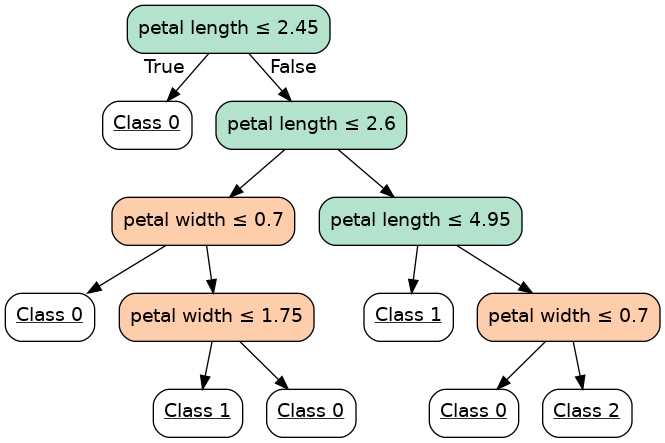

In [17]:
py_born_again = tree_io.classifier_from_file("Iris.tree", X_train, y_train, pruning=False)
display(Image(tree_view.create_graph([py_born_again.tree_], features=features).create_png()))

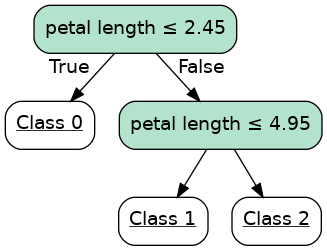

In [21]:
py_born_again_pruned = tree_io.classifier_from_file("Iris.tree", X_train, y_train, pruning=True)
display(Image(tree_view.create_graph([py_born_again_pruned.tree_], features=features).create_png()))

In [22]:
import pandas as pd
from sklearn.metrics import classification_report

rf_test_pred = rforest_clf.predict(X_test)
rf_train_pred = rforest_clf.predict(X_train)
report_rf = classification_report(y_test, rf_test_pred, output_dict=True)
report_rf_train = classification_report(y_train, rf_train_pred, output_dict=True)

ba_test_pred = py_born_again.predict(X_test)
ba_train_pred = py_born_again.predict(X_train)
report_ba = classification_report(y_test, ba_test_pred, output_dict=True)
report_ba_train = classification_report(y_train, ba_train_pred, output_dict=True)

ba_pruned_test_pred = py_born_again_pruned.predict(X_test)
ba_pruned_train_pred =  py_born_again_pruned.predict(X_train)
report_ba_pruned = classification_report(y_test, ba_pruned_test_pred, output_dict=True)
report_ba_pruned_train = classification_report(y_train, ba_pruned_train_pred, output_dict=True)

df = {' ': [], 'Train-Acc': [], 'Train-F1': [], 'Test-Acc': [], 'Test-F1': []}
def add_report(df, method, train_stat, test_stat):
    df[' '].append(method)
    df['Train-Acc'].append(train_stat['accuracy'])
    df['Train-F1'].append(train_stat['weighted avg']['f1-score'])
    df['Test-Acc'].append(test_stat['accuracy'])
    df['Test-F1'].append(test_stat['weighted avg']['f1-score'])

add_report(df, 'RandomForest', report_rf_train, report_rf)
add_report(df, 'BornAgain', report_ba_train, report_ba)
add_report(df, 'BornAgain-Pruned', report_ba_pruned_train, report_ba_pruned)

pd.DataFrame(data=df, index=None)

,,Train-Acc,Train-F1,Test-Acc,Test-F1
0,RandomForest,0.941667,0.941529,0.966667,0.96675
1,BornAgain,0.941667,0.941529,0.966667,0.96675
2,BornAgain-Pruned,0.941667,0.941529,0.966667,0.96675
